## PHYS 249 Lab \#8: Linear Equations \& Matrices

### 1) **Normal Modes of Oscillation**

(*with notes from Ch 3.12 of M. Boas, Mathematical Methods in the Physical Sciences, 3rd Edition, Wiley & Sons*)

**Background** If we consider the intersection of two lines in ${\rm I\!R}^2$, i.e. the solution to

$$ax + by + c = 0$$
$$dx + ey + f = 0\,.$$

We will further restrict ourselves to lines passing through the origin, so 

$$ax + by = 0$$
$$dx + ey = 0\,,$$

or in matrix form, 

$$\begin{bmatrix}a\ \ b \\ d\ \ e \end{bmatrix}\begin{bmatrix}x \\ y \end{bmatrix} = \begin{bmatrix}-c \\ -f \end{bmatrix}\,.$$

Clearly, the origin $(x,y) = 0,0$ is a solution to the system; more generally, the system will have non-trivial solutions $x\ne0, y\ne0$ iff the direction vectors for the two lines are colinear, which we saw was equivalent to saying the quantity ae-bd (which we recognize as the determinant of the matrix) is zero.

This turns out to be true in general; a system of *homogeneous* linear equations has non-tirival solutions iff the determinant of the coefficient matrix is zero.



**A System of Oscillators** 

Now consider the mechanical system illustrated below:


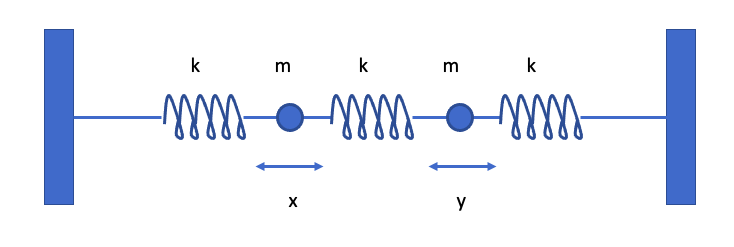

In [2]:
from IPython.display import Image
Image(filename = "oscillator.png")

Two equal masses are separated by springs; their displacement is given by $x$ and $y$ respectively.

With the notation $\ddot{x} = d^2x/dt^2$, $\ddot{y} = d^2y/dt^2$, we can write the equation of motion of the system

$$m\ddot{x} = -kx - k(x-y)\,,$$
$$m\ddot{y} = -ky - k(y-x)\,.$$

Assume an oscillatory motion $x(t) \sim \sin(\omega t)$ or $\cos(\omega t)$; then we have

$$-m\omega^2x = -2kx + ky\,,$$
$$-m\omega^2y = kx - 2ky\,.$$

In matrix form, we have 

$$\lambda \begin{bmatrix}x \\ y \end{bmatrix} = \begin{bmatrix}2\ -1 \\ -1\ \ \ 2 \end{bmatrix}\begin{bmatrix}x \\ y \end{bmatrix}$$
where $\lambda = m\omega^2/k$.

We can turn this into the homogeneous set of equations
$$\begin{bmatrix}(2 - \lambda)\ -1 \\ -1\ \ \ (2-\lambda) \end{bmatrix}\begin{bmatrix}x \\ y \end{bmatrix} = \begin{bmatrix}0 \\ 0 \end{bmatrix}\,.$$

From our background note above, these equations will have a non-trivial solution iff the determinant of the matrix is zero.

**To do**

Write out (in markdown if you want) the determinant in terms of the coefficients and the parameter $\lambda$. What are the solutions (i.e. the values of $\lambda$ such that det = 0)? What frequencies do these correspond to?

For each of these solutions, what is the relationship between $x$ and $y$? Describe the motion in each case.


$$Det = (2-\lambda)*(2-\lambda) - (-1)(-1) = (2-\lambda)^2 - 1 $$
Setting to 0
$$(2-\lambda)^2 - 1 = 0 \rightarrow (2-\lambda)^2 = 1 \rightarrow (2-\lambda) = \pm 1$$
$$ \rightarrow \lambda  = 2 \pm 1 \rightarrow \lambda = 1, 3 $$

$$\lambda = 1 \rightarrow \begin{bmatrix}1\ -1 \\ -1\ \ \ 1 \end{bmatrix}\begin{bmatrix}x \\ y \end{bmatrix} = \begin{bmatrix}0 \\ 0 \end{bmatrix}\,. $$
$$ \rightarrow x - y = 0 \rightarrow y = x \text{ they move in sync} $$
$$ \lambda = m\omega^2/k \rightarrow 1 = m\omega^2/k \rightarrow \omega = \sqrt{\frac{k}{m}} $$


$$\lambda = 3 \rightarrow \begin{bmatrix}-1\ -1 \\ -1\ \ \ -1 \end{bmatrix}\begin{bmatrix}x \\ y \end{bmatrix} = \begin{bmatrix}0 \\ 0 \end{bmatrix}\,. $$
$$ \rightarrow -x - y = 0 \rightarrow y = -x \text{ they move oppositely} $$
$$ \lambda = m\omega^2/k \rightarrow 3 = m\omega^2/k \rightarrow \omega = \sqrt{\frac{3*k}{m}} $$

### 2) **Rotation Matrices**

**a)** Write out the matrix for a 2D rotation, counterclockwise by an angle $\theta$.

**b)** Now out the matrix for a 3D rotation, counterclockwise by an angle $\theta$ around the z axis.

**c)** Now out the matrix for a 3D rotation, counterclockwise by an angle $\phi$ around the y axis.

**d)** Show that the two rotations above do not commute.


a)
$$ \begin{bmatrix} \cos{\theta} & -\sin{\theta}\\ \sin{\theta} & \cos{\theta} \end{bmatrix} $$

b)
$$\begin{bmatrix} \cos{\theta} & -\sin{\theta} & 0\\ \sin{\theta} & \cos{\theta} & 0 \\ 0 & 0 & 1 \end{bmatrix}$$

c)
$$\begin{bmatrix} \cos{\phi} & 0 & \sin{\phi}\\ 0 & 1 & 0 \\ -\sin{\phi} & 0 & \cos{\phi} \end{bmatrix}$$

d)


In [16]:
import numpy as np 

# let theta = pi/2, phi = pi
Z = np.array([[0, -1, 0],[1, 0, 0],[0, 0, 1]])
Y = np.array([[-1, 0, 0], [0, 1, 0],[0, 0, -1]])

print(np.matmul(Z, Y))
print(np.matmul(Y, Z))
# ZY != YZ

[[ 0 -1  0]
 [-1  0  0]
 [ 0  0 -1]]
[[ 0  1  0]
 [ 1  0  0]
 [ 0  0 -1]]


### 3) **Eigenvectors and Eigenvalues**

Consider the matrix $\mathbf{A}$ above:

$$\mathbf{A} = \begin{bmatrix}2 &1 &4&1\\ 3 &4 &-1 &-1\\ 1 &-4 &1 &5\\ 2 &-2 &1 &3\end{bmatrix}\,.$$

**a)** Write code to calculate determinant of $\mathbf{A}$. (You can use existing numpy/linalg functions.)

**b)** Similarly, calculate the eigenvalues and eigenctors of $\mathbf{A}$. 

**c)** Can you diagonalize $\mathbf{A}$? If so, show how.


In [13]:
import numpy as np 
m = np.array([[2, 1, 4, 1], [3, 4, -1, -1], [1, -4, 1, 5], [2, -2, 1, 3]])
print(np.linalg.det(m))

eigvals, eigvects = np.linalg.eig(m)
# print(np.linalg.eig(m))
print(eigvals)
print(eigvects)

# print(np.linalg.d)

# we can diagonalize over C, but not R
print(np.diag(eigvals))

# or
d = np.zeros((4, 4), complex)
for i in range(4):
    d[i][i] = eigvals[i]
print(d)

67.99999999999996
[ 6.03763849+1.35286176j  6.03763849-1.35286176j -1.03763849+0.83638338j
 -1.03763849-0.83638338j]
[[-0.60349407+0.j         -0.60349407-0.j          0.63048552+0.j
   0.63048552-0.j        ]
 [-0.23252157+0.3371438j  -0.23252157-0.3371438j  -0.50124509-0.08059567j
  -0.50124509+0.08059567j]
 [-0.44119699-0.2603934j  -0.44119699+0.2603934j  -0.2376327 +0.19823402j
  -0.2376327 -0.19823402j]
 [-0.43938137-0.11201423j -0.43938137+0.11201423j -0.4634112 -0.1850128j
  -0.4634112 +0.1850128j ]]
[[ 6.03763849+1.35286176j  0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          6.03763849-1.35286176j  0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j         -1.03763849+0.83638338j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
  -1.03763849-0.83638338j]]
[[ 6.03763849+1.35286176j  0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        